# Conufsion Matrix and Metrics Calculation

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

df = pd.read_csv("./data/result/MASTER.csv")

results = []
confusion_values = []

model_columns = ["gpt-4o-mini", "gpt-4-0125-preview", "gpt-3.5-turbo-0125", "llama3.2-3b", "llama3.1-8b", "llama3-8b"]

for model in model_columns:
    # Cast SEXISM to int
    y_true = df['SEXISM'].astype(float).astype(int)
    df[model] = pd.to_numeric(df[model], errors='coerce').fillna(0).astype(int)
    y_pred = df[model]

    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    auc = roc_auc_score(y_true, y_pred)

    # Calculate confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    results.append({
        "Model": model,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "AUC": auc
    })
    
    confusion_values.append({
        "Model": model,
        "TP": tp,
        "TN": tn,
        "FP": fp,
        "FN": fn
    })

results_df = pd.DataFrame(results)
confusion_df = pd.DataFrame(confusion_values)

print("Confusion Matrix Values:")
print(confusion_df)
print("\nMetrics:")
print(results_df)

Confusion Matrix Values:
                Model   TP    TN    FP   FN
0         gpt-4o-mini  338  4180  1179  383
1  gpt-4-0125-preview  296  5102   257  425
2  gpt-3.5-turbo-0125  646  1319  4040   75
3         llama3.2-3b  136  4707   652  585
4         llama3.1-8b  599  1936  3423  122
5           llama3-8b  539  3198  2161  182

Metrics:
                Model  Accuracy  Precision    Recall  F1 Score       AUC
0         gpt-4o-mini  0.743092   0.222808  0.468793  0.302055  0.624395
1  gpt-4-0125-preview  0.887829   0.535262  0.410541  0.464678  0.681292
2  gpt-3.5-turbo-0125  0.323191   0.137857  0.895978  0.238950  0.571053
3         llama3.2-3b  0.796546   0.172589  0.188627  0.180252  0.533481
4         llama3.1-8b  0.416941   0.148931  0.830791  0.252583  0.596026
5           llama3-8b  0.614638   0.199630  0.747573  0.315113  0.672163


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

df = pd.read_csv("./data/result/MASTER.csv")

results = []

model_columns = ["gpt-4o-mini", "gpt-4-0125-preview", "gpt-3.5-turbo-0125", "llama3.2-3b", "llama3.1-8b", "llama3-8b"]

for model in model_columns:
    # Cast SEXISM to int
    y_true = df['SEXISM'].astype(float).astype(int)
    df[model] = pd.to_numeric(df[model], errors='coerce').fillna(0).astype(int)
    y_pred = df[model]

    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    auc = roc_auc_score(y_true, y_pred)

    results.append({
        "Model": model,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "AUC": auc
    })


results_df = pd.DataFrame(results)
results_melted = results_df.melt(id_vars="Model", var_name="Metric", value_name="Score")
mean_scores = results_melted.groupby("Metric")["Score"].mean()
plot_order = ["Accuracy", "Precision", "Recall", "F1 Score", "AUC"]
mean_scores = mean_scores.reindex(plot_order)
print(mean_scores)

palette = {
    "gpt-4o-mini": "#1FDCB0",
    "gpt-4-0125-preview": "#16A180",
    "gpt-3.5-turbo-0125": "#0C5443",
    "llama3.2-3b": "#0081FB",
    "llama3.1-8b": "#005AAD",
    "llama3-8b": "#003669"
}

plt.figure(figsize=(20, 8))
sns.barplot(data=results_melted, x="Metric", y="Score", hue="Model", palette=palette)

for i, (metric, mean) in enumerate(mean_scores.items()):
    plt.plot([i - 0.4, i + 0.4], [mean, mean], color='black', linestyle='-', linewidth=1.5, label=f"Average" if i == 0 else None)


plt.title("Performance Metrics Across Models", fontsize=18)
plt.xlabel("Metric", fontsize=18)
plt.ylabel("Score", fontsize=18)
plt.xticks(rotation=45, fontsize=18)
plt.yticks(fontsize=18)
plt.legend(title="Model", fontsize=16, title_fontsize=18, bbox_to_anchor=(0.6, 1), loc="upper left")
plt.tight_layout()
plt.savefig("plots/performance_metrics.png")
plt.show()

ModuleNotFoundError: No module named 'seaborn'

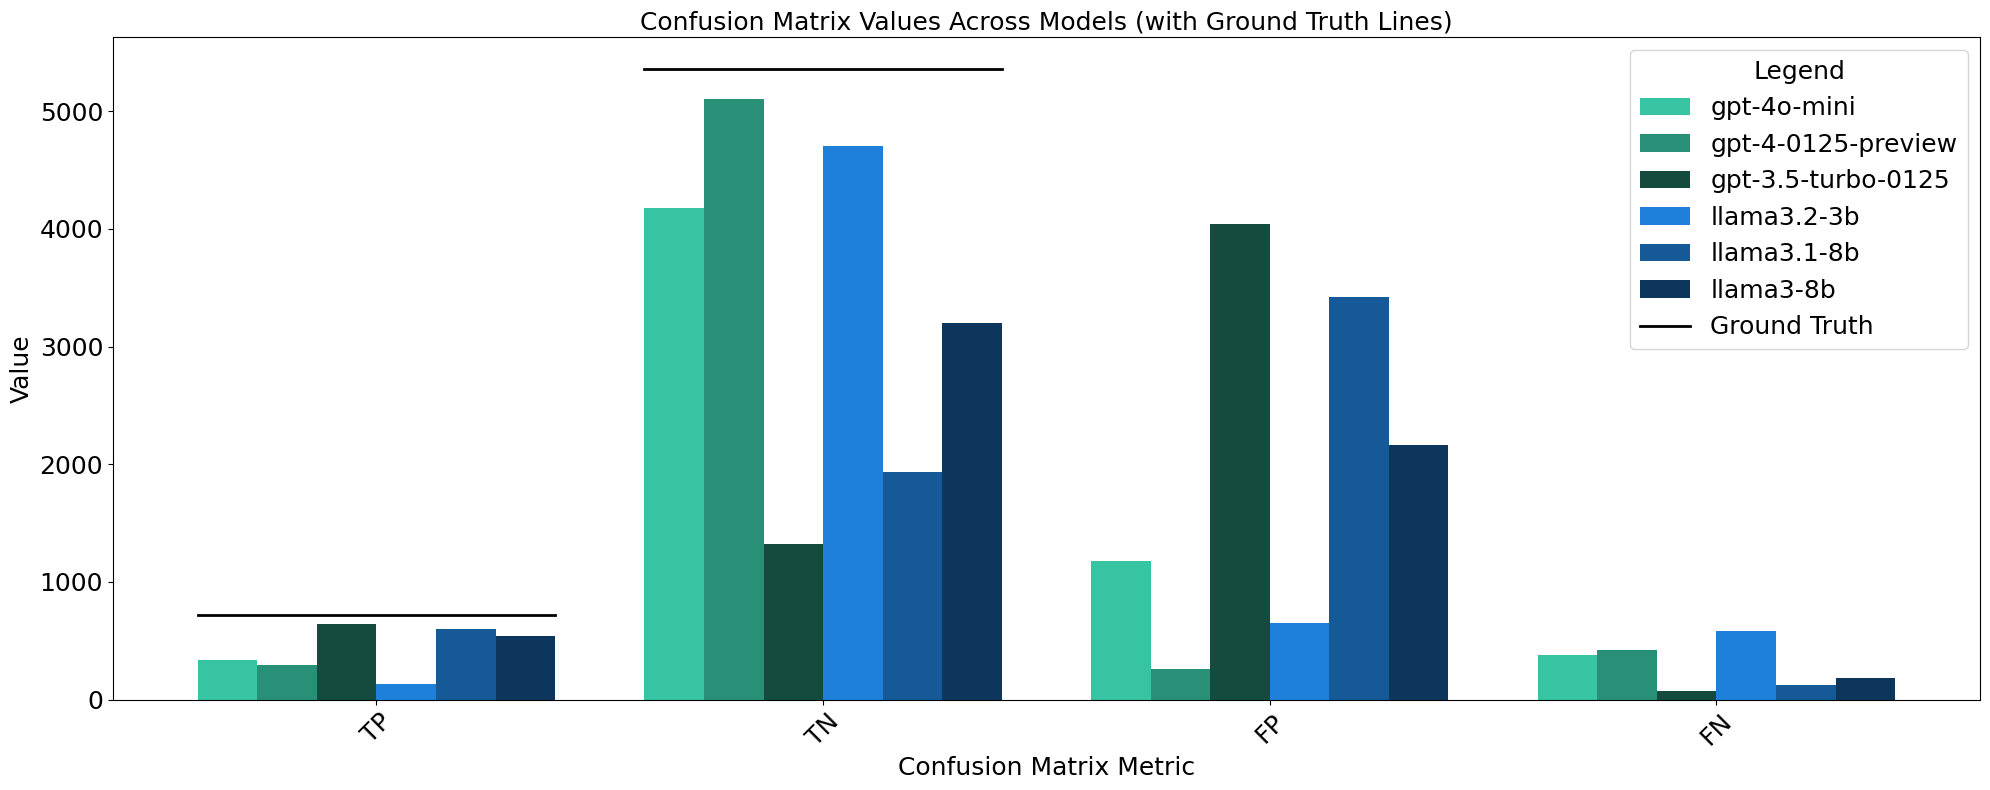

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

df = pd.read_csv("./data/result/MASTER.csv")

confusion_values = []

model_columns = ["gpt-4o-mini", "gpt-4-0125-preview", "gpt-3.5-turbo-0125", "llama3.2-3b", "llama3.1-8b", "llama3-8b"]

for model in model_columns:
    # Cast SEXISM to int
    y_true = df['SEXISM'].astype(float).astype(int)
    df[model] = pd.to_numeric(df[model], errors='coerce').fillna(0).astype(int)
    y_pred = df[model]

    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    confusion_values.append({
        "Model": model,
        "TP": tp,
        "TN": tn,
        "FP": fp,
        "FN": fn
    })

total_sexist = (df['SEXISM'] == 1).sum()
total_non_sexist = (df['SEXISM'] == 0).sum()
confusion_df = pd.DataFrame(confusion_values)
confusion_melted = confusion_df.melt(id_vars="Model", var_name="Metric", value_name="Value")

palette = {
    "gpt-4o-mini": "#1FDCB0",
    "gpt-4-0125-preview": "#16A180",
    "gpt-3.5-turbo-0125": "#0C5443",
    "llama3.2-3b": "#0081FB",
    "llama3.1-8b": "#005AAD",
    "llama3-8b": "#003669"
}

plt.figure(figsize=(20, 8))
sns.barplot(data=confusion_melted, x="Metric", y="Value", hue="Model", palette=palette)

metrics = confusion_melted["Metric"].unique()
metric_positions = {metric: i for i, metric in enumerate(metrics)}

for metric, total_count in [("TP", total_sexist), ("TN", total_non_sexist)]:
    if metric in metric_positions:
        i = metric_positions[metric]
        plt.plot(
            [i - 0.4, i + 0.4], 
            [total_count, total_count],  
            color="black" ,
            linestyle="-",
            linewidth=2,
            label=f"Ground Truth" if i == 0 else None
        )


plt.title("Confusion Matrix Values Across Models (with Ground Truth Lines)", fontsize=18)
plt.xlabel("Confusion Matrix Metric", fontsize=18)
plt.ylabel("Value", fontsize=18)
plt.xticks(rotation=45, fontsize=18)
plt.yticks(fontsize=18)
plt.legend(title="Legend", fontsize=18, title_fontsize=18)
plt.tight_layout()
plt.savefig("plots/confusion_matrix_with_metric_specific_ground_truth_lines.png")
plt.show()


# Word Probabilities

In [4]:
import pandas as pd
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

df = pd.read_csv("./data/result/MASTER.csv")

sexist_tweets = df[df["SEXISM"] == 1]
print("Number of sexist tweets: ", len(sexist_tweets))
non_sexist_tweets = df[df["SEXISM"] == 0]
print("Number of non-sexist tweets: ", len(non_sexist_tweets))

vectorizer = CountVectorizer()
X_all = vectorizer.fit_transform(df["text"])  
X_sexist = vectorizer.transform(sexist_tweets["text"])  


word_freq_all = X_all.sum(axis=0).A1  
word_freq_sexist = X_sexist.sum(axis=0).A1
words = vectorizer.get_feature_names_out()


word_counts = pd.DataFrame({
    "word": words,
    "sexist_count": word_freq_sexist,
    "total_count": word_freq_all
})

word_counts["P(sexist|word)"] = word_counts["sexist_count"] / word_counts["total_count"]
word_counts["P(word|sexist)"] = word_counts["sexist_count"] / word_freq_sexist.sum()
word_counts["P(word)"] = word_counts["total_count"] / word_freq_all.sum()

sorted_words = word_counts.sort_values(by="P(sexist|word)", ascending=False)


# print rows where sexist count is > 10
pd.set_option("display.max_columns", None) 
pd.set_option("display.width", 1000)
print(sorted_words[sorted_words["total_count"] > 10].head(10)) 

# average p(sexist|word)
print("Average P(sexist|word): ", sorted_words["P(sexist|word)"].mean())
print(len(sorted_words))


Number of sexist tweets:  721
Number of non-sexist tweets:  5359
           word  sexist_count  total_count  P(sexist|word)  P(word|sexist)   P(word)
3416   feminist            11           14        0.785714        0.001644  0.000246
3411   feminazi            69           92        0.750000        0.010309  0.001615
4266        her            17           24        0.708333        0.002540  0.000421
10139     whore            11           17        0.647059        0.001644  0.000298
5763        men            32           52        0.615385        0.004781  0.000913
10215     women            39           64        0.609375        0.005827  0.001123
8200        she            11           19        0.578947        0.001644  0.000333
2282       cunt           277          491        0.564155        0.041387  0.008618
262      actual             6           11        0.545455        0.000896  0.000193
10214     woman            16           30        0.533333        0.002391  0.000527


In [ ]:
# Chi Squared and P-value

from scipy.stats import chi2_contingency
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

df = pd.read_csv("./data/result/MASTER.csv")


sexist_tweets = df[df["SEXISM"] == 1]
non_sexist_tweets = df[df["SEXISM"] == 0]
total_sexist = len(sexist_tweets)
total_non_sexist = len(non_sexist_tweets)

vectorizer = CountVectorizer()
X_all = vectorizer.fit_transform(df["text"])  
X_sexist = vectorizer.transform(sexist_tweets["text"]) 

word_freq_all = X_all.sum(axis=0).A1  
word_freq_sexist = X_sexist.sum(axis=0).A1  
words = vectorizer.get_feature_names_out()


word_counts = pd.DataFrame({
    "word": words,
    "sexist_count": word_freq_sexist,
    "total_count": word_freq_all
})

def calculate_chi_square(row):
    word_present_sexist = row["sexist_count"]
    word_present_non_sexist = row["total_count"] - row["sexist_count"]
    word_absent_sexist = total_sexist - word_present_sexist
    word_absent_non_sexist = total_non_sexist - word_present_non_sexist
    
    contingency_table = [
        [word_present_sexist, word_present_non_sexist],
        [word_absent_sexist, word_absent_non_sexist]
    ]
    chi2, p, _, _ = chi2_contingency(contingency_table)
    return pd.Series({"chi2": chi2, "p_value": p})


word_counts[["chi2", "p_value"]] = word_counts.apply(calculate_chi_square, axis=1)

significant_words = word_counts.sort_values(by="p_value", ascending=True)

print(significant_words[significant_words["sexist_count"] > 10].head(10))

           word  sexist_count  total_count         chi2        p_value
2282       cunt           277          491  1009.908772  1.260278e-221
9565       twat           204          444   528.952929  4.772493e-117
3411   feminazi            69           92   350.201691   3.830175e-78
10215     women            39           64   144.349975   2.979028e-33
5763        men            32           52   119.098783   9.964175e-28
4266        her            17           24    74.612408   5.728205e-18
9773       user           433         4437    68.515152   1.259065e-16
7720     retard            12          633    66.037178   4.424971e-16
7723   retarded            17          629    55.295460   1.037078e-13
3416   feminist            11           14    53.523735   2.554874e-13
